<a href="https://colab.research.google.com/github/anp-hub/quant-finance/blob/main/MarketData/01-StockIndexData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily stock price data
We will use yfinance to download and plot the **Daily Price Data** and **Adjusted Daily Price Data**

[Open,High,Low,Close,Volume]

In [1]:
pip install --upgrade yfinance

## Import libraries

In [2]:
import pandas as pd

In [3]:
# To fetch financial data
import yfinance as yf

In [5]:
# Download the price data of Amazon (AMZN) from Jan 2023 to Dec 2023
# Set the ticker as 'AMZN' and specify the start and end dates
price_data_amzn = yf.download('AMZN', start='2023-01-01', end='2023-12-31')

# Display the last 5 rows
price_data_amzn.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,153.770004,154.350006,152.710007,153.419998,153.419998,29480100
2023-12-26,153.559998,153.979996,153.029999,153.410004,153.410004,25067200
2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700
2023-12-28,153.720001,154.080002,152.949997,153.380005,153.380005,27057000
2023-12-29,153.100006,153.889999,151.029999,151.940002,151.940002,39789000


## Plot the close price

<ipython-input-12-eb622e946993>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


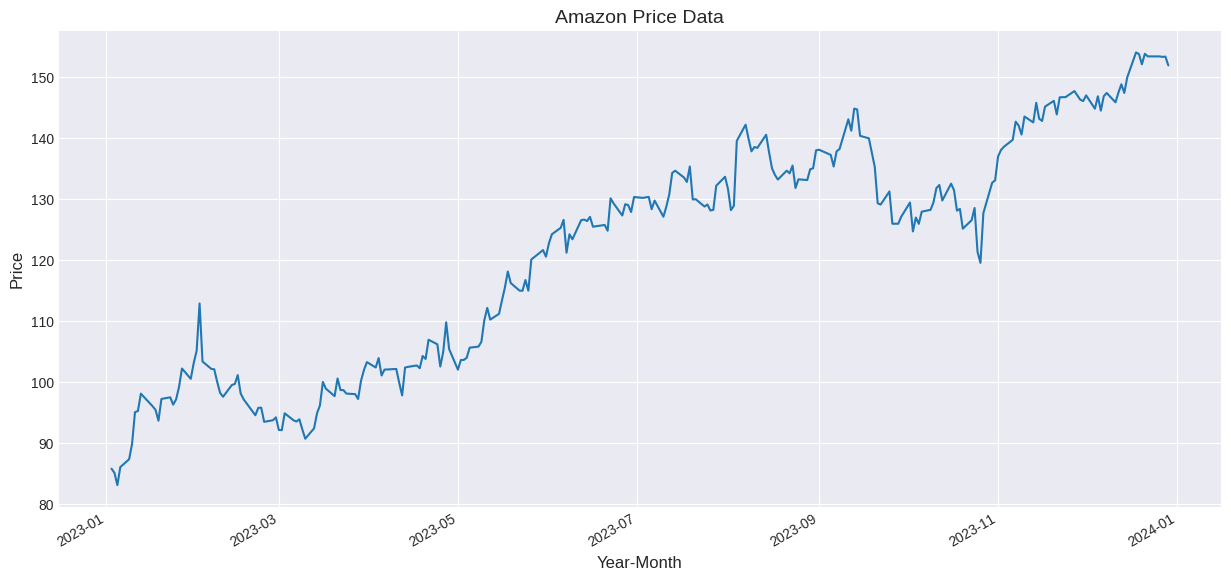

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Plot the close price
plt.figure(figsize=(15,7))
price_data_amzn['Close'].plot()

# Set the title and axces label
plt.title('Amazon Price Data', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot
plt.show()

## Adjusted daily price data

- The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions.
- The adjusted closing price factors in corporate actions, such as stock splits, dividends, and rights offerings.


In [14]:
# Download the adjusted price data for Amazon from Jan 2023 to the current date
price_data_apple_adjusted = yf.download(
    'AMZN', start='2023-01-01', end='2023-12-31', auto_adjust=True)

# Display the last 5 rows
price_data_apple_adjusted.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-12-22,153.770004,154.350006,152.710007,153.419998,29480100
2023-12-26,153.559998,153.979996,153.029999,153.410004,25067200
2023-12-27,153.559998,154.779999,153.119995,153.339996,31434700
2023-12-28,153.720001,154.080002,152.949997,153.380005,27057000
2023-12-29,153.100006,153.889999,151.029999,151.940002,39789000


## Data for multiple tickers

In [17]:
# Define the ticker list
tickers_list = ['AAPL', 'AMZN', 'MSFT', 'GOOG']

# Download the data for the above tickers and extract the Adj Close column
price_data = yf.download(tickers_list, start="2023-01-01")['Adj Close']

# Set the index to a datetime object
price_data.index = pd.to_datetime(price_data.index)

# Display the first 5 rows
price_data.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-03,124.216301,85.820000,89.699997,237.036011
2023-01-04,125.497498,85.139999,88.709999,226.667297
2023-01-05,124.166641,83.120003,86.769997,219.949371
2023-01-06,128.735245,86.080002,88.160004,222.541550
2023-01-09,129.261627,87.360001,88.800003,224.708298


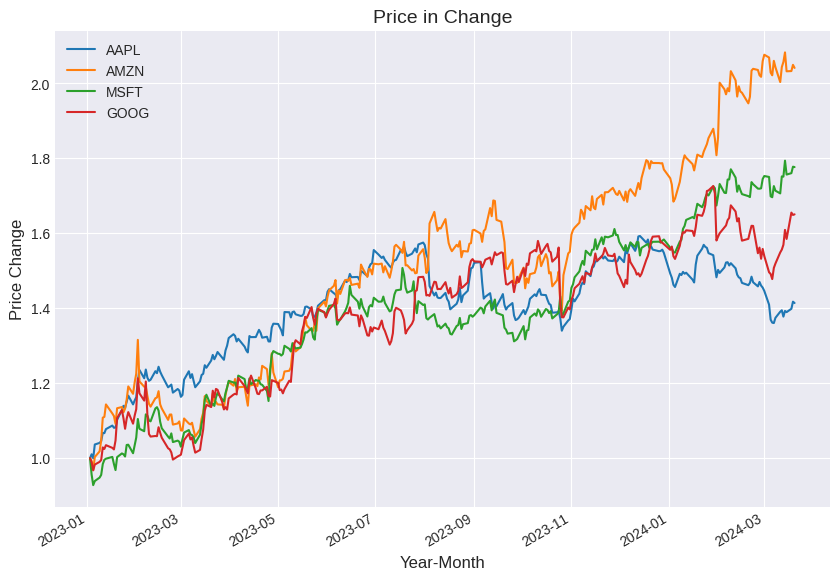

In [19]:
# Plot the absolute price series
plt.figure(figsize=(10,7))
(price_data['AAPL']/price_data['AAPL'].iloc[0]).plot()
(price_data['AMZN']/price_data['AMZN'].iloc[0]).plot()
(price_data['MSFT']/price_data['MSFT'].iloc[0]).plot()
(price_data['GOOG']/price_data['GOOG'].iloc[0]).plot()

# Set the title and axes label
plt.title('Price in Change', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price Change', fontsize=12)
plt.legend()

# Show the plot
plt.show()